In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import imdb
from keras import models, layers, optimizers, losses, metrics
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## Example of one decoded review (will not be used for training)

In [3]:
word_index = imdb.get_word_index()   # a dictionary mapping words to an integer index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [4]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
#Decodes the review from numbers to corresponding words
# the indices 0,1,2 are reserved for “padding,” “start of sequence,” and “unknown”

In [5]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

-------------------

#### method for encoding sequences of integers numbers into a binary matrix

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

#for each review an array of 10.000 length is created, and if there is a word under number 5, then 1 is placed in the 5th place, other places are 0
# and there are as many arrays as the number of reviews

#### encoding x

In [7]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [8]:
X_train.shape, X_test.shape

((25000, 10000), (25000, 10000))

In [9]:
l = int(len(X_train)*0.8)
X_val = X_train[l:]
X_train = X_train[:l]

In [10]:
X_train.shape, X_val.shape

((20000, 10000), (5000, 10000))

#### encoding y

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
y_val = y_train[l:]
y_train = y_train[:l]

In [13]:
def print_metrix(y_test,y_pred):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    #print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))    

## Model building

In [14]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

C:\Users\natal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │         320,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320,577 (1.22 MB)

 Trainable params: 320,577 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc','precision','recall'])

In [18]:
history = model.fit(X_train, y_train,epochs=40,batch_size=512,validation_data=(X_val, y_val))

Epoch 1/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.7324 - loss: 0.5532 - precision: 0.7503 - recall: 0.6783 - val_acc: 0.8598 - val_loss: 0.3495 - val_precision: 0.7995 - val_recall: 0.9559
Epoch 2/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9006 - loss: 0.2733 - precision: 0.8926 - recall: 0.9106 - val_acc: 0.8936 - val_loss: 0.2759 - val_precision: 0.8776 - val_recall: 0.9117
Epoch 3/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9279 - loss: 0.2050 - precision: 0.9220 - recall: 0.9358 - val_acc: 0.8856 - val_loss: 0.2882 - val_precision: 0.8483 - val_recall: 0.9356
Epoch 4/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9403 - loss: 0.1666 - precision: 0.9338 - recall: 0.9477 - val_acc: 0.8858 - val_loss: 0.2997 - val_precision: 0.8458 - val_recall: 0.9401
Epoch 5/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9496 - loss: 0.1448 - precision: 0.9437 - recall: 0.9560 - val_acc: 0.8852 - val_loss: 0.2983 - val_precision: 0.8577 - val_recall: 0.9202
Epoch 6/4

#### Evaluating

In [19]:
def plot_stats(metric, values, val_values):
    epochs = range(1, len(values) + 1)
    plt.figure(figsize=(6,5))
    plt.plot(epochs, values, 'bo', label=f'Training {metric}') 
    plt.plot(epochs, val_values, 'b', label=f'Validation {metric}') 
    plt.title(f'Training and validation {metric}')
    plt.xlabel('Epochs')
    plt.ylabel(f'{metric}')
    plt.legend()
    plt.show()

In [20]:
result_df = pd.DataFrame()
result_df['y_test'] = y_test
result_df['y_pred_prob'] = model.predict(X_test)
result_df['y_pred'] = list(map(lambda x: 1 if x>=0.5 else 0, result_df['y_pred_prob']))

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [21]:
result_df

,y_test,y_pred_prob,y_pred
0,0.0,1.279076e-03,0
1,1.0,1.000000e+00,1
2,1.0,9.688801e-09,0
3,0.0,5.596029e-01,1
4,1.0,9.999893e-01,1
...,...,...,...
24995,1.0,1.000000e+00,1
24996,1.0,9.970772e-01,1
24997,0.0,3.697172e-04,0
24998,0.0,4.133861e-06,0


In [22]:
print_metrix(result_df.y_test,result_df.y_pred)

test-set confusion matrix:
 [[10952  1548]
 [ 1942 10558]]
recall score:  0.84464
precision score:  0.8721295225508012
f1 score:  0.8581646752824514
accuracy score:  0.8604


In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss', 'precision', 'recall', 'val_acc', 'val_loss', 'val_precision', 'val_recall'])

In [24]:
metrics_list = [['acc','val_acc'],['loss', 'val_loss'],['precision','val_precision'],['recall','val_recall']]

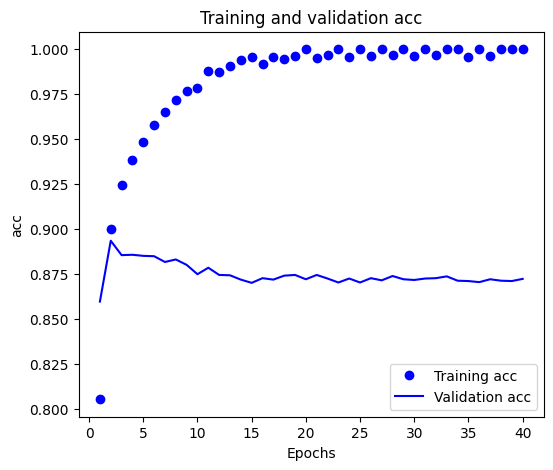

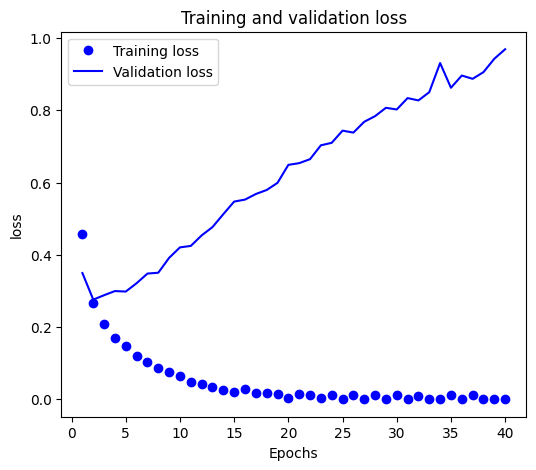

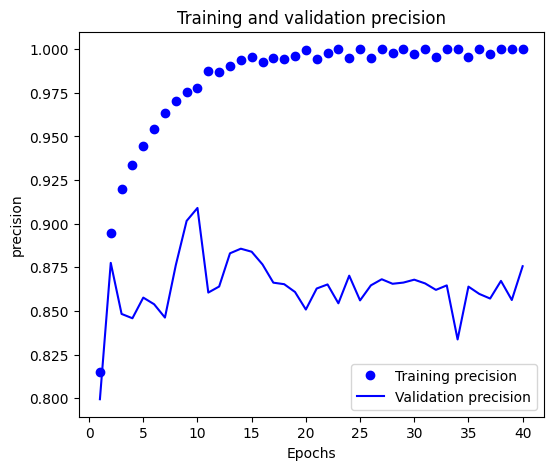

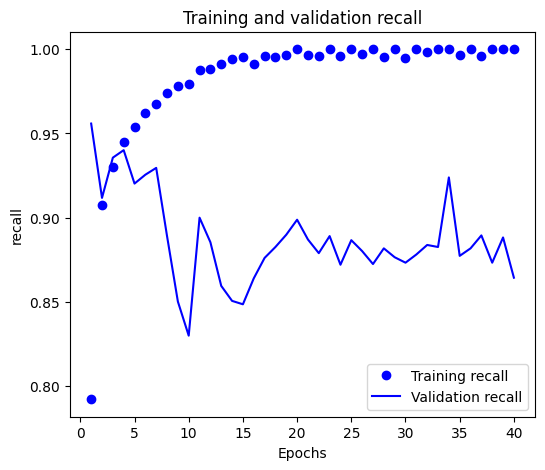

In [25]:
for el in metrics_list:
    plot_stats(el[0],history_dict[el[0]], history_dict[el[1]])

## Second architechture - with embedding layer

In [26]:
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
import pandas as pd
import numpy as np

In [27]:
model_emb = Sequential()

model_emb = models.Sequential()
model_emb.add(Embedding(X_train.shape[1], 8, input_length=20))
model_emb.add(Flatten())
model_emb.add(layers.Dense(1, activation='sigmoid'))

C:\Users\natal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [28]:
model_emb.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
model_emb.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc','precision','recall'])

In [30]:
history = model_emb.fit(X_train, y_train,epochs=10,batch_size=512,validation_data=(X_val, y_val))

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 397ms/step - acc: 0.5196 - loss: 14.4891 - precision: 0.5186 - recall: 0.6434 - val_acc: 0.5782 - val_loss: 0.6751 - val_precision: 0.5406 - val_recall: 0.9700
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 384ms/step - acc: 0.6433 - loss: 0.6584 - precision: 0.6349 - recall: 0.6933 - val_acc: 0.5326 - val_loss: 0.8238 - val_precision: 0.9648 - val_recall: 0.0555
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 386ms/step - acc: 0.6479 - loss: 3.3145 - precision: 0.6686 - recall: 0.6208 - val_acc: 0.8156 - val_loss: 0.4393 - val_precision: 0.8924 - val_recall: 0.7124
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 385ms/step - acc: 0.8503 - loss: 0.3905 - precision: 0.8547 - recall: 0.8468 - val_acc: 0.8652 - val_loss: 0.3400 - val_precision: 0.8230 - val_recall: 0.9263
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 387ms/step - acc: 0.8855 - loss: 0.2904 - precision: 0.8765 - recall: 0.8951 - val_acc: 0.8130 - val_loss: 0.3979 - val_precision: 0.9576 - val_recall: 0

#### Evaluating

In [31]:
result_df2 = pd.DataFrame()
result_df['y_pred_prob_2'] = model_emb.predict(X_test)
result_df['y_pred_2'] = list(map(lambda x: 1 if x>=0.5 else 0, result_df['y_pred_prob_2']))

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [32]:
result_df

,y_test,y_pred_prob,y_pred,y_pred_prob_2,y_pred_2
0,0.0,1.279076e-03,0,0.173185,0
1,1.0,1.000000e+00,1,0.999991,1
2,1.0,9.688801e-09,0,0.513102,1
3,0.0,5.596029e-01,1,0.808778,1
4,1.0,9.999893e-01,1,0.973768,1
...,...,...,...,...,...
24995,1.0,1.000000e+00,1,0.999425,1
24996,1.0,9.970772e-01,1,0.778824,1
24997,0.0,3.697172e-04,0,0.055910,0
24998,0.0,4.133861e-06,0,0.079372,0


In [33]:
print_metrix(result_df.y_test,result_df.y_pred_2)

test-set confusion matrix:
 [[10760  1740]
 [ 1222 11278]]
recall score:  0.90224
precision score:  0.8663389153479797
f1 score:  0.8839250724978447
accuracy score:  0.88152


In [34]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss', 'precision', 'recall', 'val_acc', 'val_loss', 'val_precision', 'val_recall'])

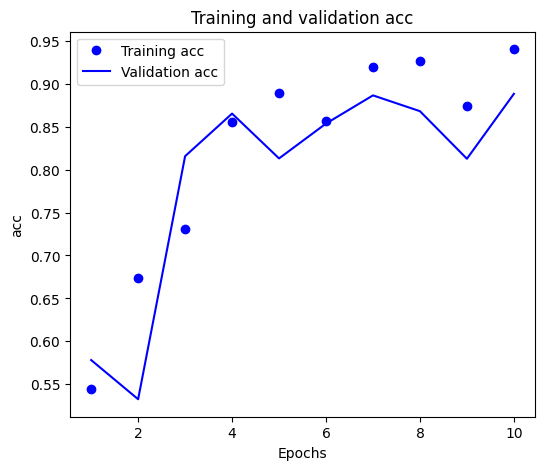

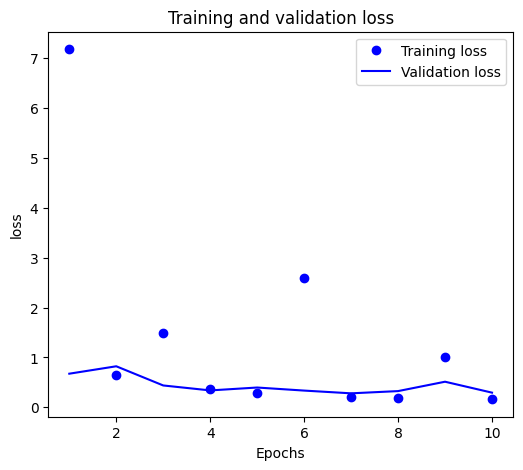

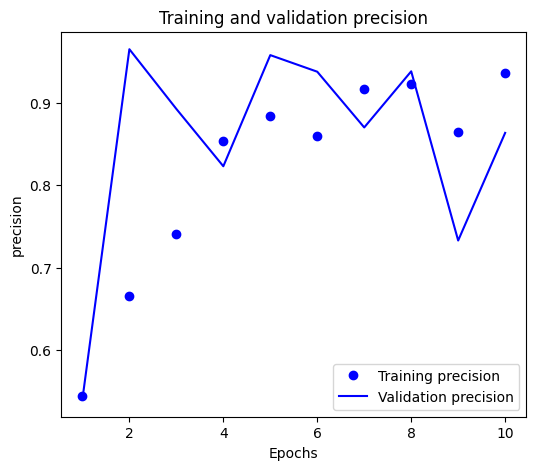

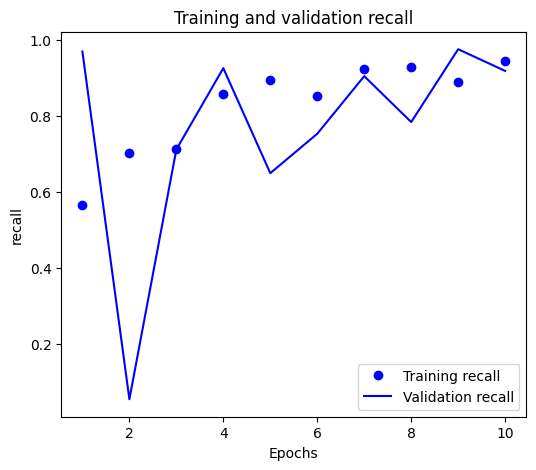

In [35]:
for el in metrics_list:
    plot_stats(el[0],history_dict[el[0]], history_dict[el[1]])

## Conclusion

#### Architecture with Embedding layer performs slightly better